# **Efficient Frontier and Capital Market Line**

## **Import Packages**

In [61]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

#### **Import Dataset**

In [62]:
df = pd.read_csv('daftar saham.csv', delimiter = ';')
df.head(10)

,Kode,Nama Perusahaan,Kepemilikan,Tanggal Pencatatan,Total Saham,Papan Pencatatan,Sektor,Subsektor,Industri,Kode Subindustri,Subindustri,Index,Mkt Cap,Total Rev
0,AALI,Astra Agro Lestari,Tbk.,09/12/97,1.924688e+09,Utama,Consumer Non-Cyclical,Food & Beverage,Agricultural Products,D232,Plantations & Crops,"COMPOSITE, ESGQKEHATI, ESGSKEHATI, IDX80, IDXN...",1.438700e+13,4.761180e+12
1,ABBA,Mahaka Media,Tbk.,03/04/02,3.935893e+09,Pemantauan Khusus,Consumer Cyclical,Media & Entertainment,Media,E614,Consumer Publishing,"COMPOSITE, IDXCYCLIC",3.581660e+11,3.019227e+10
2,ABDA,Asuransi Bina Dana Arta,Tbk.,06/07/89,6.208067e+08,Pemantauan Khusus,Financial,Insurance,Insurance,G412,General Insurance,"COMPOSITE, IDXFINANCE, IDXSMC-COM",4.004200e+12,2.835570e+11
3,ABMM,ABM Investama,Tbk.,06/12/11,2.753165e+09,Utama,Energy,Multi-sector Holdings,Multi-sector Holdings,C311,Multi-sector Holdings,"COMPOSITE, IDXINDUST, IDXSHAGROW, IDXSMC-COM, ...",8.452220e+12,5.809020e+12
4,ACES,Ace Hardware Indonesia,Tbk.,06/11/07,1.715000e+10,Utama,Consumer Cyclical,Retailing,Specialty Retail,E743,Home Improvement Retail,"COMPOSITE, IDX80, IDXCYCLIC, IDXESGL, IDXQ30, ...",1.157630e+13,1.702300e+12
5,ACST,Acset Indonusa,Tbk.,24/06/13,1.267516e+10,Utama,Infrastructure,Heavy Constructions & Civil Engineering,Heavy Constructions & Civil Engineering,J211,Heavy Constructions & Civil Engineering,"COMPOSITE, IDXINFRA, IDXSMC-COM, ISSI, MBX",1.622420e+12,3.603500e+11
6,ADCP,Adhi Commuter Properti,Tbk.,21/05/21,2.222222e+10,Utama,Properties and Real Estate,Properties & Real Estate,Real Estate Management & Development,H111,Real Estate Development & Management,"COMPOSITE, IDXPROPERT, IDXSMC-COM, ISSI, MBX",1.288890e+12,1.332490e+11
7,ADES,Akasha Wira International,Tbk.,13/06/94,5.898968e+08,Pengembangan,Consumer Non-Cyclical,Food & Beverage,Beverages,D212,Soft Drinks,"COMPOSITE, DBX, IDXNONCYC, IDXSMC-COM, ISSI",4.999380e+12,3.767490e+11
8,ADHI,Adhi Karya,Persero,18/03/04,8.407609e+09,Utama,Infrastructure,Heavy Constructions & Civil Engineering,Heavy Constructions & Civil Engineering,J211,Heavy Constructions & Civil Engineering,"COMPOSITE, IDXBUMN20, IDXINFRA, IDXSMC-COM, ID...",3.783420e+12,2.668090e+12
9,ADMF,Adira Dinamika Multi Finance,Tbk.,31/03/04,1.000000e+09,Utama,Financial,Financing Service,Consumer Financing,G211,Consumer Financing,"COMPOSITE, I-GRADE, IDXFINANCE, IDXSMC-COM, MBX",1.137500e+13,1.836900e+12


**This dataset provides information about companies listed on a Indonesia Stock Exchange**

1. Kode: The ticker symbol representing the company.

2. Nama Perusahaan: The name of the company.

3. Kepemilikan: The ownership status of the company.

4. Tanggal Pencatatan: The date when the company was listed on the stock exchange.

5. Total Saham: The total number of shares issued by the company.

6. Papan Pencatatan: The stock exchange board where the company is listed.

7. Sektor: The sector to which the company belongs.

8. Subsektor: A more specific category within the sector.

9. Industri: The industry in which the company operates.

10. Kode Subindustri: The code representing the subindustry.

11. Subindustri: The specific subindustry to which the company belongs.

12. Index: The stock market index(es) that include the company's stock.

13. Mkt Cap: The market capitalization of the company, which is the total value of its outstanding shares.

14. Total Rev: The total revenue generated by the company.

Each row in the dataset represents a different company, and the columns provide various details about each company's listing, ownership, sector, industry, and financial information such as market capitalization and revenue.

In [63]:
df['Kode'] = df['Kode']+'.JK'
df.head()

,Kode,Nama Perusahaan,Kepemilikan,Tanggal Pencatatan,Total Saham,Papan Pencatatan,Sektor,Subsektor,Industri,Kode Subindustri,Subindustri,Index,Mkt Cap,Total Rev
0,AALI.JK,Astra Agro Lestari,Tbk.,09/12/97,1.924688e+09,Utama,Consumer Non-Cyclical,Food & Beverage,Agricultural Products,D232,Plantations & Crops,"COMPOSITE, ESGQKEHATI, ESGSKEHATI, IDX80, IDXN...",1.438700e+13,4.761180e+12
1,ABBA.JK,Mahaka Media,Tbk.,03/04/02,3.935893e+09,Pemantauan Khusus,Consumer Cyclical,Media & Entertainment,Media,E614,Consumer Publishing,"COMPOSITE, IDXCYCLIC",3.581660e+11,3.019227e+10
2,ABDA.JK,Asuransi Bina Dana Arta,Tbk.,06/07/89,6.208067e+08,Pemantauan Khusus,Financial,Insurance,Insurance,G412,General Insurance,"COMPOSITE, IDXFINANCE, IDXSMC-COM",4.004200e+12,2.835570e+11
3,ABMM.JK,ABM Investama,Tbk.,06/12/11,2.753165e+09,Utama,Energy,Multi-sector Holdings,Multi-sector Holdings,C311,Multi-sector Holdings,"COMPOSITE, IDXINDUST, IDXSHAGROW, IDXSMC-COM, ...",8.452220e+12,5.809020e+12
4,ACES.JK,Ace Hardware Indonesia,Tbk.,06/11/07,1.715000e+10,Utama,Consumer Cyclical,Retailing,Specialty Retail,E743,Home Improvement Retail,"COMPOSITE, IDX80, IDXCYCLIC, IDXESGL, IDXQ30, ...",1.157630e+13,1.702300e+12


Add .JK thus the tickers can be recognized and imported.

#### **Data Information**

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Kode                872 non-null    object 
 1   Nama Perusahaan     872 non-null    object 
 2   Kepemilikan         872 non-null    object 
 3   Tanggal Pencatatan  872 non-null    object 
 4   Total Saham         872 non-null    float64
 5   Papan Pencatatan    872 non-null    object 
 6   Sektor              872 non-null    object 
 7   Subsektor           860 non-null    object 
 8   Industri            858 non-null    object 
 9   Kode Subindustri    858 non-null    object 
 10  Subindustri         858 non-null    object 
 11  Index               859 non-null    object 
 12  Mkt Cap             860 non-null    float64
 13  Total Rev           860 non-null    float64
dtypes: float64(3), object(11)
memory usage: 95.5+ KB


In [65]:
top = df.sort_values('Mkt Cap', ascending=False)[['Kode', 'Nama Perusahaan', 'Mkt Cap']].head(10)
top

,Kode,Nama Perusahaan,Mkt Cap
84,BBCA.JK,Bank Central Asia,1.116690e+15
90,BBRI.JK,Bank Rakyat Indonesia,8.139860e+14
174,BYAN.JK,Bayan Resources,5.166670e+14
133,BMRI.JK,Bank Mandiri,4.804800e+14
793,TLKM.JK,Telkom Indonesia,3.962490e+14
59,ASII.JK,Astra International,2.742760e+14
804,TPIA.JK,Chandra Asri Petrochemical,1.816740e+14
89,BBNI.JK,Bank Negara Indonesia,1.689290e+14
830,UNVR.JK,Unilever Indonesia,1.625190e+14
355,ICBP.JK,Indofood CBP Sukses Makmur,1.320710e+14


The portfolio will consist of 10 biggest companies based on Market Cap.

---

#### **Get Stocks Data**

In [66]:
list_stock = list(top.Kode)

data = yf.download(list_stock, period = '10y', rounding = True)
data.head()

[*********************100%***********************]  10 of 10 completed


Adj Close                                                       \
             ASII.JK  BBCA.JK  BBNI.JK  BBRI.JK  BMRI.JK BYAN.JK  ICBP.JK   
Date                                                                        
2013-07-22   4567.50  1721.74  3077.44  1153.17  1454.55  510.49  4465.14   
2013-07-23   4672.10  1773.39  3168.49  1196.96  1531.56  507.04  4585.82   
2013-07-24   4602.37  1790.61  3113.86  1182.36  1523.00  510.49  4605.93   
2013-07-25   4602.37  1756.17  3150.28  1175.07  1471.67  507.04  4565.70   
2013-07-26   4497.77  1782.00  3204.91  1182.36  1497.34  510.49  4545.59   

                                      ...      Volume                        \
            TLKM.JK TPIA.JK  UNVR.JK  ...     ASII.JK   BBCA.JK     BBNI.JK   
Date                                  ...                                     
2013-07-22  1750.12  116.09  5075.86  ...   7650500.0  17430000  12310000.0   
2013-07-23  1787.36  128.99  5229.68  ...  17235000.0  70500000  20977500.0   
2013-07-24  1757.57  122.54  5229.68  ...  22636500.0  37715000  14535500.0   
2013-07-25  1742.68  122.54  5052.79  ...  21667000.0  19677500  20098500.0   
2013-07-26  1735.23  115.01  5068.17  ...  19944000.0  25532500  21247500.0   

                                                                            \
                BBRI.JK    BMRI.JK BYAN.JK    ICBP.JK      TLKM.JK TPIA.JK   
Date                                                                         
2013-07-22   77822500.0   76564000   70000  3829000.0   99952500.0  509350   
2013-07-23  205352500.0  141818000  235000  4718000.0  105552500.0   50935   
2013-07-24  108047500.0   87716000   80000  5941000.0   81982500.0  387106   
2013-07-25   80987500.0   88162000  205000  8371000.0   92747500.0  387106   
2013-07-26   80505000.0   47710000  195000  2232000.0   71982500.0  305610   

                      
             UNVR.JK  
Date                  
2013-07-22   4757500  
2013-07-23   8500000  
2013-07-24  12517500  
2013-07-25   8907500  
2013-07-26   3090000  

[5 rows x 60 columns]

Get 10 years of data.

In [67]:
data = data['Adj Close']
data

,ASII.JK,BBCA.JK,BBNI.JK,BBRI.JK,BMRI.JK,BYAN.JK,ICBP.JK,TLKM.JK,TPIA.JK,UNVR.JK
Date,,,,,,,,,,
2013-07-22,4567.50,1721.74,3077.44,1153.17,1454.55,510.49,4465.14,1750.12,116.09,5075.86
2013-07-23,4672.10,1773.39,3168.49,1196.96,1531.56,507.04,4585.82,1787.36,128.99,5229.68
2013-07-24,4602.37,1790.61,3113.86,1182.36,1523.00,510.49,4605.93,1757.57,122.54,5229.68
2013-07-25,4602.37,1756.17,3150.28,1175.07,1471.67,507.04,4565.70,1742.68,122.54,5052.79
2013-07-26,4497.77,1782.00,3204.91,1182.36,1497.34,510.49,4545.59,1735.23,115.01,5068.17
...,...,...,...,...,...,...,...,...,...,...
2023-07-14,6750.00,9200.00,8925.00,5525.00,5400.00,18800.00,11775.00,3930.00,2040.00,4250.00
2023-07-17,6675.00,9175.00,8950.00,5575.00,5375.00,18700.00,11650.00,3910.00,2090.00,4270.00
2023-07-18,6575.00,9150.00,8900.00,5625.00,5350.00,18600.00,11750.00,3850.00,2050.00,4270.00


Get only the adjusted close.

#### **EDA**

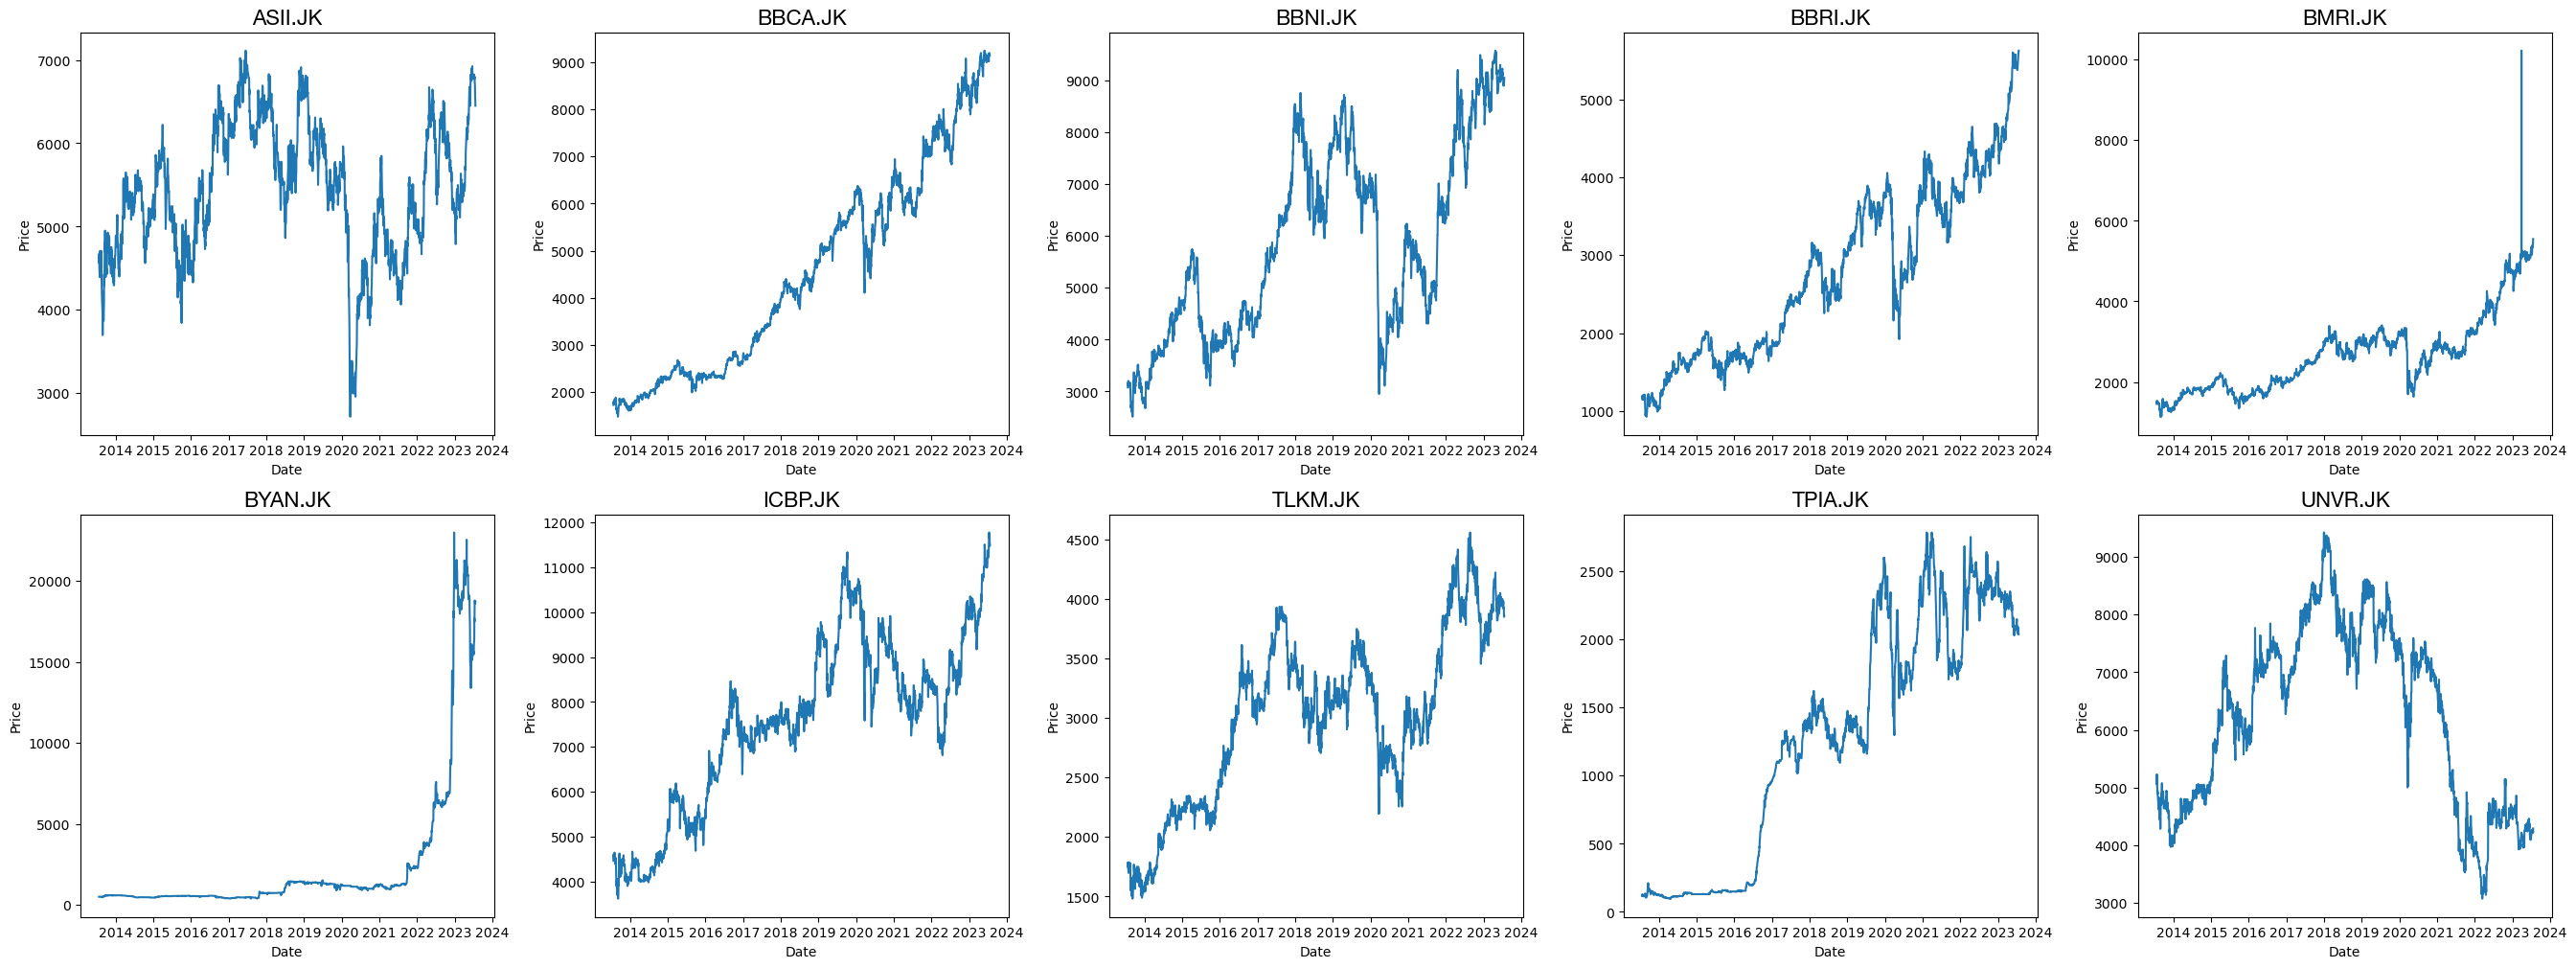

In [68]:
plt.figure(figsize=(27, 50))

for column in range(len(data.columns)):
    plt.subplot(len(data.columns), 5, column + 1)
    sns.lineplot(data = data.iloc[:,column])
    plt.title(f'{data.columns[column]}', fontsize=16, fontname='Helvetica Neue', fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [69]:
pd.DataFrame(data.isna().sum())

,0
ASII.JK,1
BBCA.JK,0
BBNI.JK,1
BBRI.JK,1
BMRI.JK,0
BYAN.JK,0
ICBP.JK,1
TLKM.JK,1
TPIA.JK,0
UNVR.JK,0


There are missing values, they need to be imputed.

Since there are small amount of missing values, thus they can be imputed using simple method such as 'ffil' (forward fill method).

In [70]:
data = data.fillna(method='ffill')

In [71]:
data.isna().sum()

ASII.JK    0
BBCA.JK    0
BBNI.JK    0
BBRI.JK    0
BMRI.JK    0
BYAN.JK    0
ICBP.JK    0
TLKM.JK    0
TPIA.JK    0
UNVR.JK    0
dtype: int64

In [72]:
data.to_csv('top 10.csv')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2477 entries, 2013-07-22 to 2023-07-21
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ASII.JK  2477 non-null   float64
 1   BBCA.JK  2477 non-null   float64
 2   BBNI.JK  2477 non-null   float64
 3   BBRI.JK  2477 non-null   float64
 4   BMRI.JK  2477 non-null   float64
 5   BYAN.JK  2477 non-null   float64
 6   ICBP.JK  2477 non-null   float64
 7   TLKM.JK  2477 non-null   float64
 8   TPIA.JK  2477 non-null   float64
 9   UNVR.JK  2477 non-null   float64
dtypes: float64(10)
memory usage: 212.9 KB


In [74]:
len(data)

2477

---

**Get Returns**

In [75]:
# Daily returns
returns = data.pct_change()
returns

,ASII.JK,BBCA.JK,BBNI.JK,BBRI.JK,BMRI.JK,BYAN.JK,ICBP.JK,TLKM.JK,TPIA.JK,UNVR.JK
Date,,,,,,,,,,
2013-07-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-23,0.022901,0.029999,0.029586,0.037974,0.052944,-0.006758,0.027027,0.021279,0.111121,0.030304
2013-07-24,-0.014925,0.009710,-0.017242,-0.012198,-0.005589,0.006804,0.004385,-0.016667,-0.050004,0.000000
2013-07-25,0.000000,-0.019234,0.011696,-0.006166,-0.033703,-0.006758,-0.008734,-0.008472,0.000000,-0.033824
2013-07-26,-0.022727,0.014708,0.017341,0.006204,0.017443,0.006804,-0.004405,-0.004275,-0.061449,0.003044
...,...,...,...,...,...,...,...,...,...,...
2023-07-14,-0.007353,0.008219,0.002809,0.013761,0.009346,0.044444,0.006410,0.002551,-0.019231,0.000000
2023-07-17,-0.011111,-0.002717,0.002801,0.009050,-0.004630,-0.005319,-0.010616,-0.005089,0.024510,0.004706
2023-07-18,-0.014981,-0.002725,-0.005587,0.008969,-0.004651,-0.005348,0.008584,-0.015345,-0.019139,0.000000


In [76]:
returns.isna().sum()

ASII.JK    1
BBCA.JK    1
BBNI.JK    1
BBRI.JK    1
BMRI.JK    1
BYAN.JK    1
ICBP.JK    1
TLKM.JK    1
TPIA.JK    1
UNVR.JK    1
dtype: int64

In [77]:
returns = returns.dropna()

In [78]:
returns.to_csv('returns clean.csv')

In [79]:
returns.corr()

,ASII.JK,BBCA.JK,BBNI.JK,BBRI.JK,BMRI.JK,BYAN.JK,ICBP.JK,TLKM.JK,TPIA.JK,UNVR.JK
ASII.JK,1.000000,0.455784,0.469808,0.459941,0.322823,-0.007254,0.327880,0.397199,0.105600,0.319883
BBCA.JK,0.455784,1.000000,0.521865,0.545884,0.381788,0.017461,0.317528,0.430279,0.108511,0.346952
BBNI.JK,0.469808,0.521865,1.000000,0.677255,0.466798,0.016650,0.328025,0.420564,0.110725,0.305813
BBRI.JK,0.459941,0.545884,0.677255,1.000000,0.451087,0.008825,0.333578,0.421876,0.103718,0.302930
BMRI.JK,0.322823,0.381788,0.466798,0.451087,1.000000,0.016761,0.221056,0.286282,0.097827,0.190376
BYAN.JK,-0.007254,0.017461,0.016650,0.008825,0.016761,1.000000,-0.004161,-0.022476,-0.005058,-0.020178
ICBP.JK,0.327880,0.317528,0.328025,0.333578,0.221056,-0.004161,1.000000,0.315459,0.080596,0.367038
TLKM.JK,0.397199,0.430279,0.420564,0.421876,0.286282,-0.022476,0.315459,1.000000,0.086600,0.300744
TPIA.JK,0.105600,0.108511,0.110725,0.103718,0.097827,-0.005058,0.080596,0.086600,1.000000,0.099112
UNVR.JK,0.319883,0.346952,0.305813,0.302930,0.190376,-0.020178,0.367038,0.300744,0.099112,1.000000


**Annualized Rate of Returns**

In [80]:
e = (((returns.dropna().mean() + 1)**252) - 1)
e

ASII.JK    0.091783
BBCA.JK    0.219019
BBNI.JK    0.179311
BBRI.JK    0.239066
BMRI.JK    0.269105
BYAN.JK    0.579821
ICBP.JK    0.144471
TLKM.JK    0.127675
TPIA.JK    0.434056
UNVR.JK    0.025963
dtype: float64

**Variance Covariance Matrix**

In [81]:
V = returns.cov()
V

,ASII.JK,BBCA.JK,BBNI.JK,BBRI.JK,BMRI.JK,BYAN.JK,ICBP.JK,TLKM.JK,TPIA.JK,UNVR.JK
ASII.JK,0.000420,0.000140,0.000202,0.000194,0.000199,-0.000004,0.000118,0.000145,0.000051,0.000122
BBCA.JK,0.000140,0.000224,0.000164,0.000168,0.000172,0.000007,0.000083,0.000115,0.000038,0.000096
BBNI.JK,0.000202,0.000164,0.000440,0.000293,0.000295,0.000009,0.000121,0.000157,0.000055,0.000119
BBRI.JK,0.000194,0.000168,0.000293,0.000425,0.000280,0.000005,0.000121,0.000155,0.000050,0.000116
BMRI.JK,0.000199,0.000172,0.000295,0.000280,0.000905,0.000014,0.000117,0.000153,0.000069,0.000106
BYAN.JK,-0.000004,0.000007,0.000009,0.000005,0.000014,0.000738,-0.000002,-0.000011,-0.000003,-0.000010
ICBP.JK,0.000118,0.000083,0.000121,0.000121,0.000117,-0.000002,0.000309,0.000099,0.000033,0.000120
TLKM.JK,0.000145,0.000115,0.000157,0.000155,0.000153,-0.000011,0.000099,0.000316,0.000036,0.000099
TPIA.JK,0.000051,0.000038,0.000055,0.000050,0.000069,-0.000003,0.000033,0.000036,0.000556,0.000043
UNVR.JK,0.000122,0.000096,0.000119,0.000116,0.000106,-0.000010,0.000120,0.000099,0.000043,0.000344


### **Portfolio Performance**

**Define the stock's weight**

**Expected Return of Portfolio**

In [82]:
# Naive portfolio with equal weights for each asset
w = np.array([1 / len(V)] * len(V))
w

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [83]:
# Portfolio expected return
np.dot(w, e)

0.23102710224818132

**Volatility of Portfolio**

In [84]:
# Variance
np.dot(np.dot(w, V), w)

0.0001397181732546643

In [85]:
# Standard deviation
np.sqrt(np.dot(np.dot(w, V), w))

0.011820244212987493

### **Create a Function that consist of these steps**

**Data Prep**

In [86]:
def dataPrep(stocks, period):
    # Get stocks data
    data = yf.download(stocks, period = period, rounding = True)['Adj Close']
    
    # Get rate of return
    returns = data.pct_change()
    
    # Get expected return
    e = (((returns.mean() + 1)**252) - 1)
    
    # Get variance and covariance matrix
    V = returns.cov()
    
    return e, V


In [87]:
e, V = dataPrep(list_stock, '10y')

[*********************100%***********************]  10 of 10 completed


**Portfolio Performance**

In [88]:
def portfolioPerformance(w, e, V):
    # Change weight to an array
    w = np.array(w)
    
    # Expected return of portfolio
    eRp = np.sum(w * e)
    
    # Volatility of portfolio
    # 1. Variance
    varPortfolio = np.dot(np.dot(w, V), w)
    
    # 2. Standard Deviation
    stdPortfolio = np.sqrt(varPortfolio)
    
    return eRp, varPortfolio, stdPortfolio
    

In [89]:
weights = np.array([1 / len(V)] * len(V))

portfolioPerformance(weights, e, V)

(0.23102699554038825, 0.00013971800423486717, 0.011820237063395436)

---

#### **Optimal Weights for given Expected Return**

**1. Determine the expected return of the individual risky asset.**

In [90]:
# Expected return of the individual asset
e

ASII.JK    0.091783
BBCA.JK    0.219019
BBNI.JK    0.179311
BBRI.JK    0.239066
BMRI.JK    0.269105
BYAN.JK    0.579820
ICBP.JK    0.144471
TLKM.JK    0.127675
TPIA.JK    0.434057
UNVR.JK    0.025963
dtype: float64

**2. Determine the Variance Covariance Returns**

In [91]:
# Variance-covariance matrix
V

,ASII.JK,BBCA.JK,BBNI.JK,BBRI.JK,BMRI.JK,BYAN.JK,ICBP.JK,TLKM.JK,TPIA.JK,UNVR.JK
ASII.JK,0.000420,0.000140,0.000202,0.000194,0.000199,-0.000004,0.000118,0.000145,0.000051,0.000122
BBCA.JK,0.000140,0.000224,0.000164,0.000168,0.000172,0.000007,0.000083,0.000115,0.000038,0.000096
BBNI.JK,0.000202,0.000164,0.000440,0.000293,0.000295,0.000009,0.000121,0.000157,0.000055,0.000119
BBRI.JK,0.000194,0.000168,0.000293,0.000425,0.000280,0.000005,0.000121,0.000155,0.000050,0.000116
BMRI.JK,0.000199,0.000172,0.000295,0.000280,0.000905,0.000014,0.000117,0.000153,0.000069,0.000106
BYAN.JK,-0.000004,0.000007,0.000009,0.000005,0.000014,0.000738,-0.000002,-0.000011,-0.000003,-0.000010
ICBP.JK,0.000118,0.000083,0.000121,0.000121,0.000117,-0.000002,0.000309,0.000099,0.000033,0.000120
TLKM.JK,0.000145,0.000115,0.000157,0.000155,0.000153,-0.000011,0.000099,0.000316,0.000036,0.000099
TPIA.JK,0.000051,0.000038,0.000055,0.000050,0.000069,-0.000003,0.000033,0.000036,0.000556,0.000043
UNVR.JK,0.000122,0.000096,0.000119,0.000116,0.000106,-0.000010,0.000120,0.000099,0.000043,0.000344


In [92]:
V.shape

(10, 10)

**3. Determine V inverse**

In [93]:
# V inverse
V_i = np.linalg.inv(V)
pd.DataFrame(V_i)

,0,1,2,3,4,5,6,7,8,9
0,3600.860690,-815.663748,-566.156345,-428.099510,-127.797296,25.575144,-394.410609,-555.659008,-75.702267,-356.919281
1,-815.663748,7653.700013,-803.416635,-1284.241571,-342.786033,-76.613558,-249.073276,-907.624669,-87.148274,-682.350882
2,-566.156345,-803.416635,4902.223553,-2187.906345,-515.085646,-43.717528,-226.293623,-435.432522,-58.372989,-164.882646
3,-428.099510,-1284.241571,-2187.906345,5103.898418,-402.966881,2.975958,-300.915310,-427.398235,-15.542456,-95.620088
4,-127.797296,-342.786033,-515.085646,-402.966881,1511.615946,-17.292314,-52.071264,-86.472090,-60.406831,38.198475
5,25.575144,-76.613558,-43.717528,2.975958,-17.292314,1358.131902,-2.133811,75.301653,8.353694,50.017268
6,-394.410609,-249.073276,-226.293623,-300.915310,-52.071264,-2.133811,4191.419114,-459.087634,-40.945281,-914.909210
7,-555.659008,-907.624669,-435.432522,-427.398235,-86.472090,75.301653,-459.087634,4470.129990,-30.645556,-352.025619
8,-75.702267,-87.148274,-58.372989,-15.542456,-60.406831,8.353694,-40.945281,-30.645556,1839.639358,-113.280792
9,-356.919281,-682.350882,-164.882646,-95.620088,38.198475,50.017268,-914.909210,-352.025619,-113.280792,3738.642544


**4. Determine a vector that consist of ones**

In [94]:
# Matrix one
ones = np.ones(len(e))
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**5. Determine the optimal the portfolio for a required portfolio expected return**

In [95]:
A = e @ (V_i @ ones)
A

2325.813410855159

In [96]:
B = e.T @ (V_i @ e)
B

1028.3372029290729

In [97]:
C = ones.T @ (V_i @ ones)
C

9256.970641164802

In [98]:
D = (B * C) - A**2
D

4109879.2746182494

In [99]:
g = ((B * V_i @ ones) - (A * V_i @ e)) / D
g

array([ 0.21330789,  0.1454177 ,  0.0622675 , -0.17494211, -0.05761447,
       -0.09341451,  0.22587404,  0.28212469, -0.07366229,  0.47064156])

In [100]:
h = ((C * V_i @ e) - (A * V_i @ ones)) / D
h

array([-0.71740797,  0.45517579, -0.29041417,  0.68088778,  0.20563624,
        0.96539721, -0.23188888, -0.56777283,  0.88048263, -1.3800958 ])

In [101]:
# Required portfolio return
eRp = 0.10  # It can be arbitrarily selected

optWeights = g + h * eRp
optWeights

array([ 0.14156709,  0.19093528,  0.03322609, -0.10685333, -0.03705085,
        0.00312521,  0.20268515,  0.22534741,  0.01438597,  0.33263198])

These are the optimal weights that generate the lowest volatility for a given portfolio return.

Notice that there are weights which are non-positive, implies that they are shorted.

In [102]:
sum(optWeights)

0.9999999999999999

---

#### **Efficient Frontier**

In [103]:
Rps = []
risks = []

for rp in np.arange(0,1.01,0.001):
    w = g + h * rp
    risk = np.sqrt(w.T @ V @ w)
    
    Rps.append(rp)
    risks.append(risk)

ef = pd.DataFrame({'risk': risks, 'eRp': Rps})

In [104]:
ef

,risk,eRp
0,0.015818,0.000
1,0.015782,0.001
2,0.015747,0.002
3,0.015711,0.003
4,0.015675,0.004
...,...,...
1005,0.037252,1.005
1006,0.037297,1.006
1007,0.037343,1.007
1008,0.037388,1.008


In [105]:
ef.to_csv('EfficientFrontier.csv', index=False)

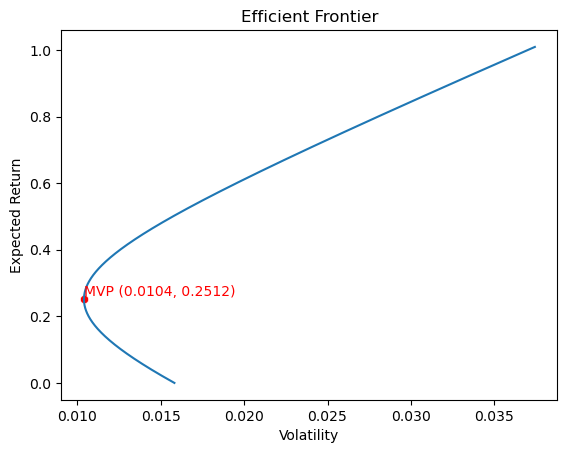

In [106]:
plt.plot(ef['risk'], ef['eRp'])

# MVP
sns.scatterplot(x=[np.sqrt(1/C)], y=[A/C], color='red')

# Add MVP coordinate labels
mvp_label = f'MVP ({np.sqrt(1/C):.4f}, {A/C:.4f})'
plt.text(np.sqrt(1/C), A/C, mvp_label, color='red', ha='left', va='bottom')

# Add axis labels and title
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')

# Display the plot
plt.show()


In [107]:
# MVP volatility
np.sqrt(1/C)

0.010393589420463473

In [108]:
# MVP eRp
A/C

0.2512499500119947

---

### **Capital Market Line**

**1. Determine risk-free rate**

In [109]:
# Risk-free rate
Rf = 0.0575

Risk-free rate is obtained from:

https://www.bi.go.id/id/statistik/indikator/bi-7day-rr.aspx

In [110]:
ef.head()

,risk,eRp
0,0.015818,0.000
1,0.015782,0.001
2,0.015747,0.002
3,0.015711,0.003
4,0.015675,0.004


In [111]:
# Sharpe Ratio
ef['sharpe_r'] = (ef.eRp - Rf) / ef.risk
ef

,risk,eRp,sharpe_r
0,0.015818,0.000,-3.635085
1,0.015782,0.001,-3.579956
2,0.015747,0.002,-3.524563
3,0.015711,0.003,-3.468905
4,0.015675,0.004,-3.412980
...,...,...,...
1005,0.037252,1.005,25.435105
1006,0.037297,1.006,25.430835
1007,0.037343,1.007,25.426573
1008,0.037388,1.008,25.422317


In [112]:
# Tangency Portfolio
tp = ef.iloc[ef.sharpe_r.argmax()]
tp

risk         0.015693
eRp          0.499000
sharpe_r    28.133155
Name: 499, dtype: float64

#### **CML Plot**

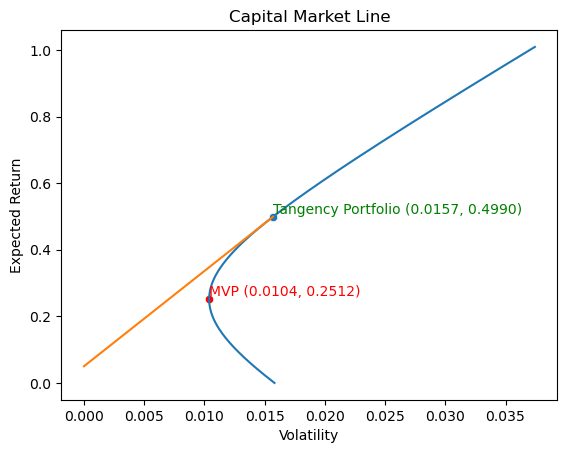

In [113]:
# Plotting the efficient frontier
plt.plot(ef['risk'], ef['eRp'])

# MVP
sns.scatterplot(x=[np.sqrt(1/C)], y=[A/C], color='red')

# Tangency Portfolio
sns.scatterplot(x=[ef.iloc[ef.sharpe_r.argmax()].loc['risk']],
                y=[ef.iloc[ef.sharpe_r.argmax()].loc['eRp']])

# Capital Allocation Line
Rf = 0.05  # Risk-free rate
tp_risk = ef.iloc[ef.sharpe_r.argmax()].loc['risk']
tp_er = ef.iloc[ef.sharpe_r.argmax()].loc['eRp']
plt.plot([0, tp_risk], [Rf, tp_er])


# Add MVP coordinate labels
mvp_label = f'MVP ({np.sqrt(1/C):.4f}, {A/C:.4f})'
plt.text(np.sqrt(1/C), A/C, mvp_label, color='red', ha='left', va='bottom')

# Add tangency portfolio coordinate label
tp_label = f'Tangency Portfolio ({tp_risk:.4f}, {tp_er:.4f})'
plt.text(tp_risk, tp_er, tp_label, color='green', ha='left', va='bottom')

# Add axis labels and title
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.title('Capital Market Line')

# Display the plot
plt.show()


---